<h2>Fernando Limón Flores</h2> 
<h3>A00819824</h3>
<h2>Héctor Noel León Quiroz</h2> 
<h3>A01251806</h3>
<h2>Ricardo Marcelo Lozano Gil</h2> 
<h3>A01176405</h3>
<h2>Alitzel Adriana Macías Infante</h2> 
<h3>A01373166</h3>
<h2>Adrián Ricardo Mancilla Uribe</h2> 
<h3>A01196967</h3>

<h3>Actividad Integradora</h3>

In [43]:
import requests
from bs4 import BeautifulSoup
import re

In [142]:
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)

In [143]:
soup = BeautifulSoup(page.content, 'html.parser')

In [144]:
script = soup.find_all('script', type='text/javascript')

In [145]:
#Cast to string
stringTag = str(script[7])

In [190]:
#Find date data in the string
categoriesStr = 'categories: ["'
dateLowerBound = string.find(categoriesStr)
dateUpperBound = string.find(']', dateLowerBound + len(categoriesStr))

In [209]:
dirtyDates = string[dateLowerBound + len(categoriesStr): dateUpperBound - 1].split('"')

In [210]:
Date = list(filter(lambda a: a != ",", dirtyDates))

In [211]:
len(Date)

406

In [165]:
#Find number of cases in the string
dataStr = 'data: ['
dataLowerBound = string.find(dataStr)
dataUpperBound = string.find(']', dataLowerBound + len(dataStr))

In [196]:
cases = string[dataLowerBound + len(dataStr): dataUpperBound].split(',')

In [197]:
len(cases)

406

In [215]:
#Linear Regression
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [226]:
X = np.arange(0, len(Date), dtype=float).reshape(-1,1)
y = np.array(cases).reshape(-1,1)

In [230]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

TypeError: unhashable type: 'numpy.ndarray'

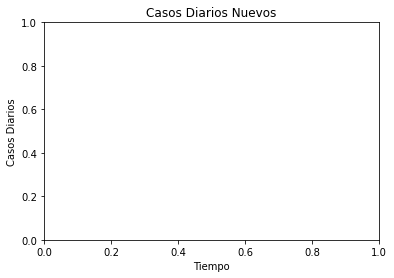

In [233]:
plt.xlabel('Tiempo')
plt.ylabel('Casos Diarios')
plt.title('Casos Diarios Nuevos')
plt.plot(X, y,color='b')
plt.plot(X, model.predict(X),color='r')

plt.show()